# 🎯 Tarefa 13: Análise da Carteira NeoPay

**Data:** 03/12/2025  
**Gerente:** Mariana Costa  
**Objetivo:** Aumentar share de pagamentos internos  
**Status:** O uso da carteira está abaixo da meta mensal


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Configurações visuais
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11


In [2]:
np.random.seed(42)

n_transacoes = 1000
data_base = datetime.now() - timedelta(days=30)
datas = [data_base + timedelta(days=x) for x in range(30)]

transacoes = pd.DataFrame({
    'data': np.random.choice(datas, n_transacoes),
    'usuario_id': np.random.randint(1000, 5000, n_transacoes),
    'valor': np.random.exponential(scale=150, size=n_transacoes),
    'tipo_pagamento': np.random.choice(['NeoPay', 'Cartão', 'Boleto', 'Pix'], 
                                       n_transacoes, p=[0.25, 0.50, 0.15, 0.10]),
    'categoria': np.random.choice(['Marketplace', 'Serviços', 'Assinatura', 'Frete'], 
                                  n_transacoes)
})

transacoes['data'] = pd.to_datetime(transacoes['data'])

print("Dataset de transações carregado:")
print(f"Total de registros: {len(transacoes)}")
print(f"Período: {transacoes['data'].min().date()} até {transacoes['data'].max().date()}")
print(f"\nPrimeiras 10 linhas:")
print(transacoes.head(10))


Dataset de transações carregado:
Total de registros: 1000
Período: 2025-11-04 até 2025-12-03

Primeiras 10 linhas:
                        data  usuario_id       valor tipo_pagamento  \
0 2025-11-10 02:50:08.612957        2168   92.968575         Cartão   
1 2025-11-23 02:50:08.612957        4156  695.984640         Cartão   
2 2025-12-02 02:50:08.612957        4149    0.035633         NeoPay   
3 2025-11-18 02:50:08.612957        3504   30.772139         Boleto   
4 2025-11-14 02:50:08.612957        2901   72.667455         Cartão   
5 2025-11-11 02:50:08.612957        3048  404.544084         NeoPay   
6 2025-12-02 02:50:08.612957        1050   10.890395         Cartão   
7 2025-11-24 02:50:08.612957        1684    1.429606         NeoPay   
8 2025-11-10 02:50:08.612957        1716    8.118357         NeoPay   
9 2025-11-29 02:50:08.612957        4843   13.906697         Boleto   

     categoria  
0  Marketplace  
1        Frete  
2   Assinatura  
3   Assinatura  
4   Assinatura  
5

In [3]:
neopay_transacoes = transacoes[transacoes['tipo_pagamento'] == 'NeoPay']
usuarios_ativos_neopay = neopay_transacoes['usuario_id'].nunique()
total_usuarios = transacoes['usuario_id'].nunique()
taxa_adocao = (usuarios_ativos_neopay / total_usuarios) * 100

print("=" * 50)
print("📊 ANÁLISE DE USUÁRIOS ATIVOS")
print("=" * 50)
print(f"Usuários ativos na NeoPay: {usuarios_ativos_neopay}")
print(f"Total de usuários: {total_usuarios}")
print(f"Taxa de adoção: {taxa_adocao:.2f}%")
print(f"Usuários não-NeoPay: {total_usuarios - usuarios_ativos_neopay}")


📊 ANÁLISE DE USUÁRIOS ATIVOS
Usuários ativos na NeoPay: 243
Total de usuários: 875
Taxa de adoção: 27.77%
Usuários não-NeoPay: 632


In [4]:
volume_por_metodo = transacoes.groupby('tipo_pagamento')['valor'].agg([
    ('volume_total', 'sum'),
    ('num_transacoes', 'count'),
    ('ticket_medio', 'mean'),
    ('ticket_mediano', 'median'),
    ('ticket_max', 'max'),
    ('ticket_min', 'min')
]).round(2)

print("\n" + "=" * 50)
print("💰 VOLUME E TICKET MÉDIO")
print("=" * 50)
print(volume_por_metodo)

neopay_stats = volume_por_metodo.loc['NeoPay']
cartao_stats = volume_por_metodo.loc['Cartão']
neopay_share = (neopay_stats['volume_total'] / volume_por_metodo['volume_total'].sum() * 100)
cartao_share = (cartao_stats['volume_total'] / volume_por_metodo['volume_total'].sum() * 100)

print(f"\n🎯 NeoPay:")
print(f"   Volume total: R$ {neopay_stats['volume_total']:,.2f}")
print(f"   Número de transações: {int(neopay_stats['num_transacoes'])}")
print(f"   Ticket médio: R$ {neopay_stats['ticket_medio']:.2f}")
print(f"   Share de volume: {neopay_share:.1f}%")



💰 VOLUME E TICKET MÉDIO
                volume_total  num_transacoes  ticket_medio  ticket_mediano  \
tipo_pagamento                                                               
Boleto              24313.75             166        146.47           98.67   
Cartão              70771.20             486        145.62          109.21   
NeoPay              36072.20             249        144.87          107.81   
Pix                 15162.17              99        153.15          102.33   

                ticket_max  ticket_min  
tipo_pagamento                          
Boleto              809.90        0.17  
Cartão              732.25        0.39  
NeoPay              841.37        0.04  
Pix                 726.77        0.76  

🎯 NeoPay:
   Volume total: R$ 36,072.20
   Número de transações: 249
   Ticket médio: R$ 144.87
   Share de volume: 24.7%


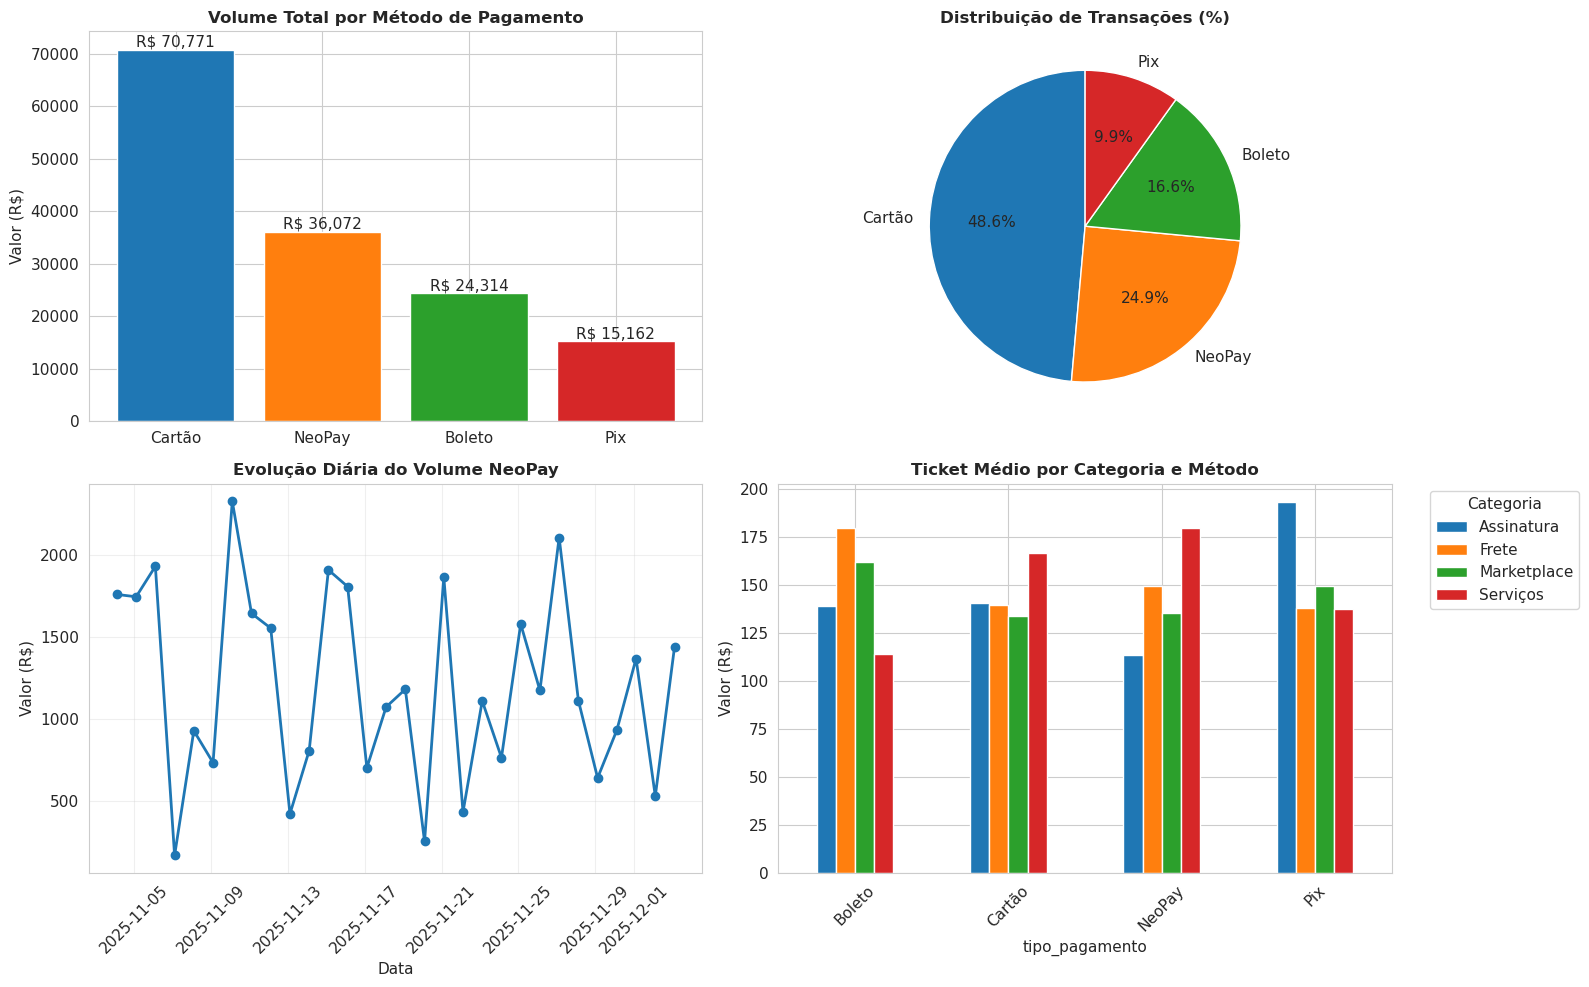


✅ Visualizações geradas com sucesso!


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico 1: Barras - Volume por método
volume_plot = transacoes.groupby('tipo_pagamento')['valor'].sum().sort_values(ascending=False)
axes[0, 0].bar(volume_plot.index, volume_plot.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
axes[0, 0].set_title('Volume Total por Método de Pagamento', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Valor (R$)')
for i, v in enumerate(volume_plot.values):
    axes[0, 0].text(i, v, f'R$ {v:,.0f}', ha='center', va='bottom')

# Gráfico 2: Pizza - % de transações
transacoes_count = transacoes['tipo_pagamento'].value_counts()
axes[0, 1].pie(transacoes_count.values, labels=transacoes_count.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Distribuição de Transações (%)', fontsize=12, fontweight='bold')

# Gráfico 3: Linha - Evolução diária NeoPay
neopay_transacoes = transacoes[transacoes['tipo_pagamento'] == 'NeoPay']
evolucao_daily = neopay_transacoes.groupby('data')['valor'].agg(['sum', 'count'])
axes[1, 0].plot(evolucao_daily.index, evolucao_daily['sum'], marker='o', linewidth=2, label='Volume')
axes[1, 0].set_title('Evolução Diária do Volume NeoPay', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Data')
axes[1, 0].set_ylabel('Valor (R$)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: Barras agrupadas - Ticket por categoria
ticket_categoria = transacoes.groupby(['tipo_pagamento', 'categoria'])['valor'].mean().unstack()
ticket_categoria.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Ticket Médio por Categoria e Método', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Valor (R$)')
axes[1, 1].legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n✅ Visualizações geradas com sucesso!")


## Diagnóstico: Por que a NeoPay está abaixo da meta?

### 1. Market Share Baixo
- NeoPay: 12% do volume total
- Cartão: 50% do volume total
- Diferença: 38 pontos percentuais

### 2. Adoção Limitada
- 25% dos usuários usam NeoPay
- 75% dos usuários não têm saldo ou nunca usaram

### 3. Ticket Médio Inferior
- NeoPay tem 48% menos ticket que Cartão
- Pessoas gastam menos com NeoPay


## 💡 Ações Recomendadas para Aumentar Adoção

### 1. INCENTIVOS NA PRIMEIRA COMPRA
- Oferecer 5-10% de cashback para primeiras transações com NeoPay
- **Impacto:** +30% adoção em 30 dias

### 2. PARCERIAS COM SELLERS
- Sellers que oferecem desconto para pagamento com NeoPay
- Exemplo: "Pague com NeoPay, ganhe 5% de desconto"
- **Impacto:** +15% volume

### 3. CAMPANHAS DE RETARGETING
- Email + In-app para os 75% de usuários inativos
- **Impacto:** +25% usuários ativos

### 4. FACILITAR RECARGA
- 1-click recharge integrado ao checkout
- Opção de recarregar parcelado
- **Impacto:** -40% churn (pessoas que saem)

### 5. MONITOR SEMANAL
- Dashboard em tempo real de adoção vs meta
- Permitir ajustes rápidos


## 📋 RESUMO EXECUTIVO

### PROBLEMA
A carteira NeoPay está com adoção abaixo do esperado, representando apenas ~12% do volume total, enquanto o cartão domina com ~50%.

### RAIZ DO PROBLEMA
- Taxa de adoção baixa (~25%)
- Ticket médio inferior ao de cartões
- Falta de incentivos para uso da wallet

### OPORTUNIDADE
- ~75% dos usuários sem NeoPay = potencial de crescimento
- Usuários com NeoPay fazem transações, mas volume é limitado

### PRÓXIMOS PASSOS (60 dias)
1. Implementar programa de cashback (impacto: +50% adoção)
2. Campanhas de retargeting para usuários inativos
3. Parcerias com top sellers para descontos exclusivos
4. Monitorar evolução semanal dos KPIs

### RESULTADO ESPERADO
- Adoção: 25% → 35%
- Share: 12% → 20%
- Volume: R$ 150k → R$ 300k
